In [1]:
%cd ..

/Users/amyrfrancisco/Developer/projects/enhanced-eigenface/src


/Users/amyrfrancisco/Developer/projects/enhanced-eigenface/.venv/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import utils.helpers as helpers
from algorithms.eigenface_enhanced import EnhancedEigenface
from algorithms.eigenface_orig import Eigenface
from sklearn.model_selection import train_test_split

/Users/amyrfrancisco/Developer/projects/enhanced-eigenface/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load dataset

In [3]:
import numpy as np

N = 100
images, labels = helpers.load_images_labels('../dataset/yaleB', N, N)

# # For each label, only select I images
# I = 2
# unique_labels = set(labels)
# new_images = []
# new_labels = []
# for label in unique_labels:
#     new_images.extend(images[labels == label][:I])
#     new_labels.extend([label] * I)

# images = np.array(new_images)
# labels = np.array(new_labels)

train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

print(f"Train images: {len(train_images)}")
print(f"Test images: {len(test_images)}")

Train images: 1931
Test images: 483


## Existing Algorithm

In [4]:
existing_model = Eigenface(M=int(len(train_labels) * 0.15))
existing_model.fit(train_images, train_labels)

In [5]:
existing_model.score(test_images, test_labels)

0.7391304347826086

## Proposed Algorithm

In [6]:
proposed_model = EnhancedEigenface(M=int(len(train_labels) * 0.15))
proposed_model.fit(train_images, train_labels)

In [7]:
proposed_model.score(test_images, test_labels)

0.9979296066252588

## Analyze results

### Cross validation
Cross validate using Stratified KFold with 10 splits

In [8]:
from sklearn.model_selection import StratifiedKFold

# Cross validate using Stratified KFold with 10 splits
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Existing algorithm
model = existing_model
scores = []
for train_index, test_index in skf.split(images, labels):
    temp_train_images, temp_test_images = images[train_index], images[test_index]
    temp_train_labels, temp_test_labels = labels[train_index], labels[test_index]
    score = model.score(temp_test_images, temp_test_labels)
    scores.append(score)

print("\n======================================")
print("Existing algorithm")
print(f"Accuracies: {scores}")
print(f"Mean: {np.mean(scores)}")
print(f"Std: {np.std(scores)}")
print("======================================\n")

# Proposed algorithm
model = proposed_model
scores = []
for train_index, test_index in skf.split(images, labels):
    temp_train_images, temp_test_images = images[train_index], images[test_index]
    temp_train_labels, temp_test_labels = labels[train_index], labels[test_index]
    score = model.score(temp_test_images, temp_test_labels)
    scores.append(score)

print("\n======================================")
print("Proposed algorithm")
print(f"Accuracies: {scores}")
print(f"Mean: {np.mean(scores)}")
print(f"Std: {np.std(scores)}")
print("======================================\n")


Existing algorithm
Accuracies: [0.7892561983471075, 0.7520661157024794, 0.7520661157024794, 0.756198347107438, 0.8091286307053942, 0.7759336099585062, 0.7966804979253111, 0.7842323651452282, 0.7966804979253111, 0.7717842323651453]
Mean: 0.77840266108844
Std: 0.019220268430840348


Proposed algorithm
Accuracies: [1.0, 1.0, 1.0, 1.0, 1.0, 0.995850622406639, 0.995850622406639, 1.0, 0.9875518672199171, 1.0]
Mean: 0.9979253112033195
Std: 0.0038255371192086533



### Normalized lighting in image using Weber Local Descriptor
J. Chen et al.,
"WLD: A Robust Local Image Descriptor,"
in IEEE Transactions on Pattern Analysis and Machine Intelligence,
vol. 32, no. 9, pp. 1705-1720,
Sept. 2010.

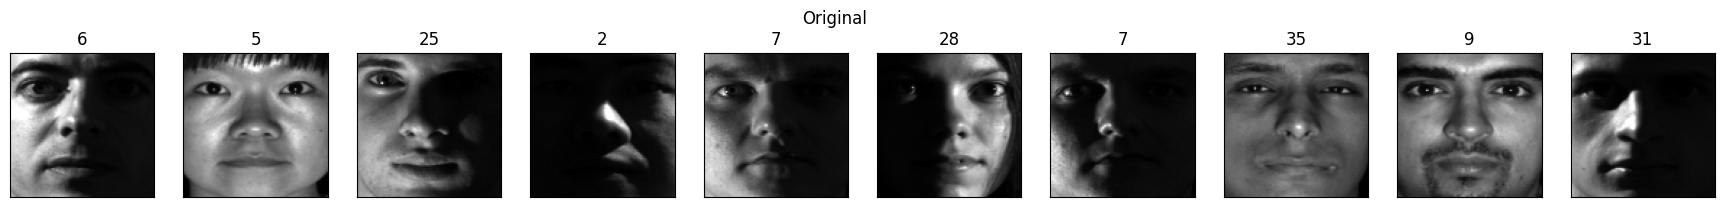

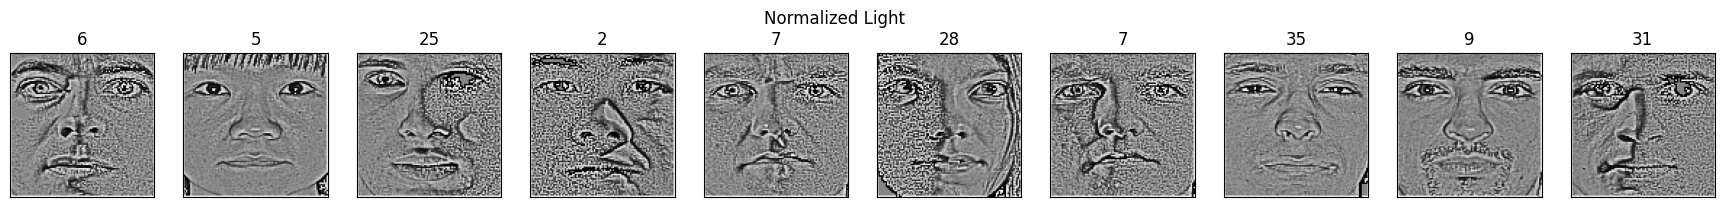

In [9]:
sample_images = train_images[:10]
sample_labels = train_labels[:10]
sample_images_norm_light = proposed_model._X_norm_light[:10]

helpers.plot_portraits(sample_images, sample_labels, N, N, 1, title="Original")
helpers.plot_portraits(sample_images_norm_light, sample_labels, N, N, 1, title="Normalized Light")

### Mean face

#### Existing algorithm

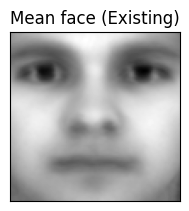

In [10]:
helpers.plot_portraits([existing_model._mean_face], ["Mean face (Existing)"], N, N)

#### Proposed algorithm

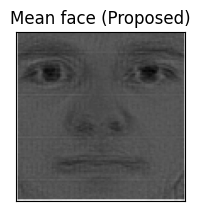

In [19]:
helpers.plot_portraits([proposed_model._mean_face], ["Mean face (Proposed)"], N, N)

### Plot confusion matrix

#### Existing algorithm

              precision    recall  f1-score   support

           1       1.00      0.75      0.86        12
           2       1.00      0.62      0.77        16
           3       1.00      0.57      0.73        14
           4       0.45      1.00      0.62        10
           5       1.00      0.69      0.82        13
           6       1.00      0.67      0.80        15
           7       0.62      1.00      0.76         8
           8       0.85      0.69      0.76        16
           9       0.91      0.91      0.91        11
          10       0.80      0.67      0.73        12
          11       0.93      0.87      0.90        15
          12       1.00      0.62      0.77         8
          13       1.00      0.64      0.78        14
          15       1.00      0.78      0.88         9
          16       1.00      0.60      0.75        10
          17       0.67      0.73      0.70        11
          18       1.00      1.00      1.00        12
          19       1.00    

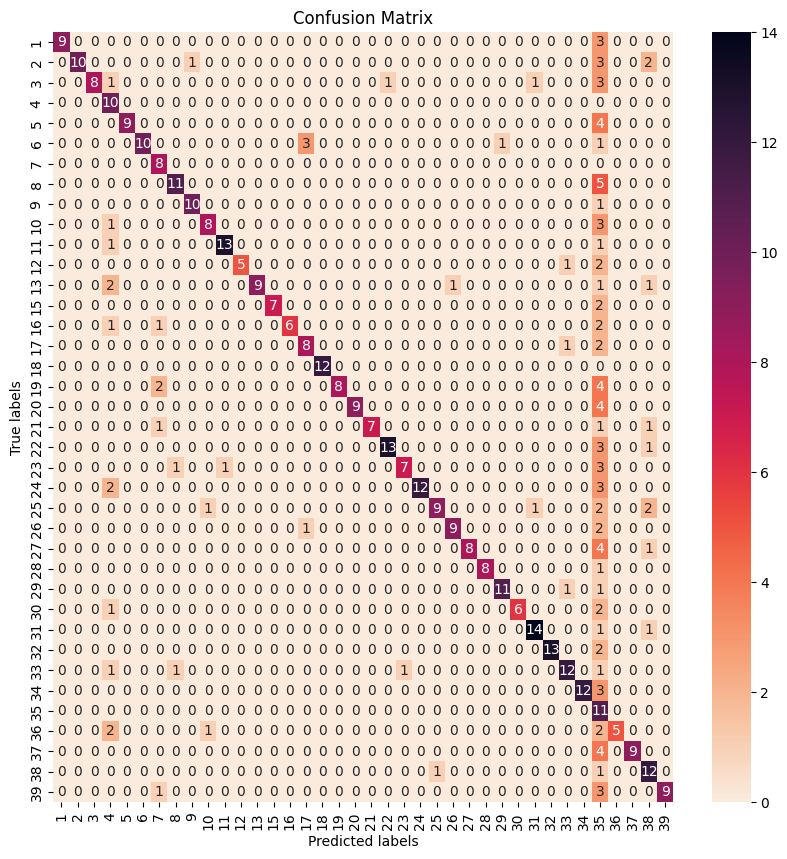

In [12]:
existing_y_pred = existing_model.predict(test_images)

helpers.plot_confusion_matrix(test_labels, existing_y_pred)

#### Proposed algorithm

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00        15
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00        16
           9       1.00      1.00      1.00        11
          10       1.00      1.00      1.00        12
          11       1.00      1.00      1.00        15
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00        14
          15       1.00      1.00      1.00         9
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        11
          18       1.00      1.00      1.00        12
          19       1.00    

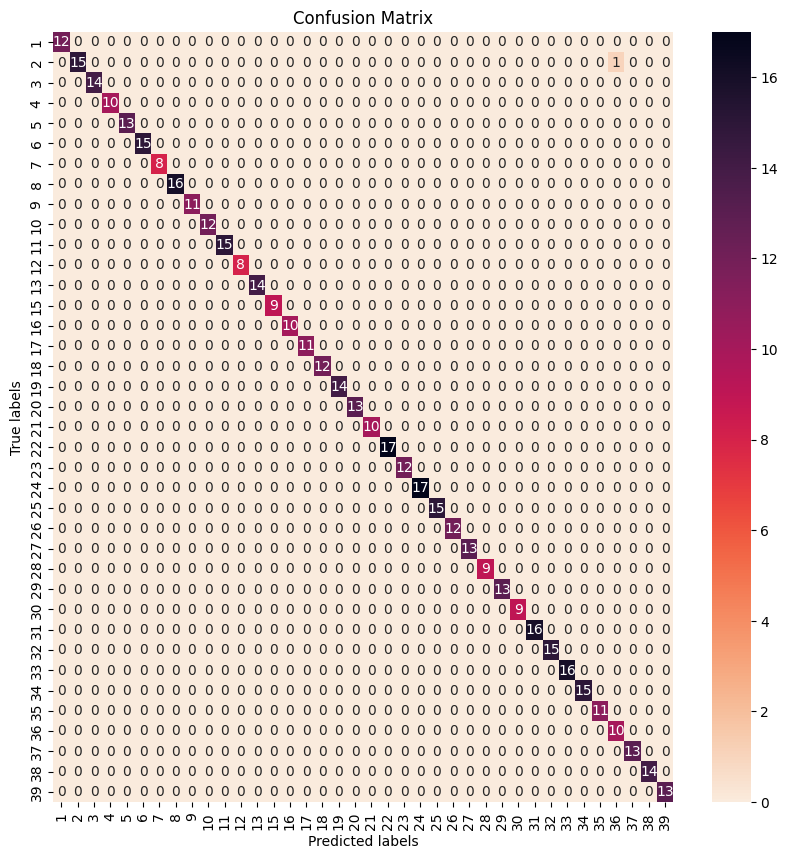

In [13]:
proposed_y_pred = proposed_model.predict(test_images)

helpers.plot_confusion_matrix(test_labels, proposed_y_pred)

### Plot weights

#### Existing algorithm

/Users/amyrfrancisco/Developer/projects/enhanced-eigenface/.venv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


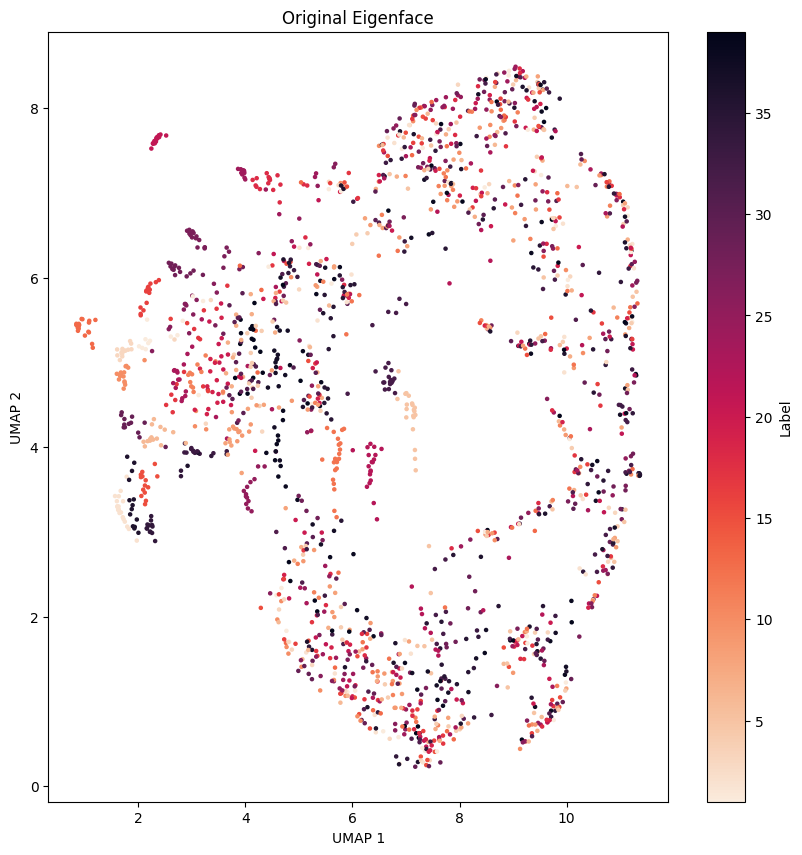

In [14]:
existing_model_weights = existing_model._X_weights

helpers.plot_umap_2d("Original Eigenface", existing_model_weights, train_labels)

#### Proposed algorithm

/Users/amyrfrancisco/Developer/projects/enhanced-eigenface/.venv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/amyrfrancisco/Developer/projects/enhanced-eigenface/.venv/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


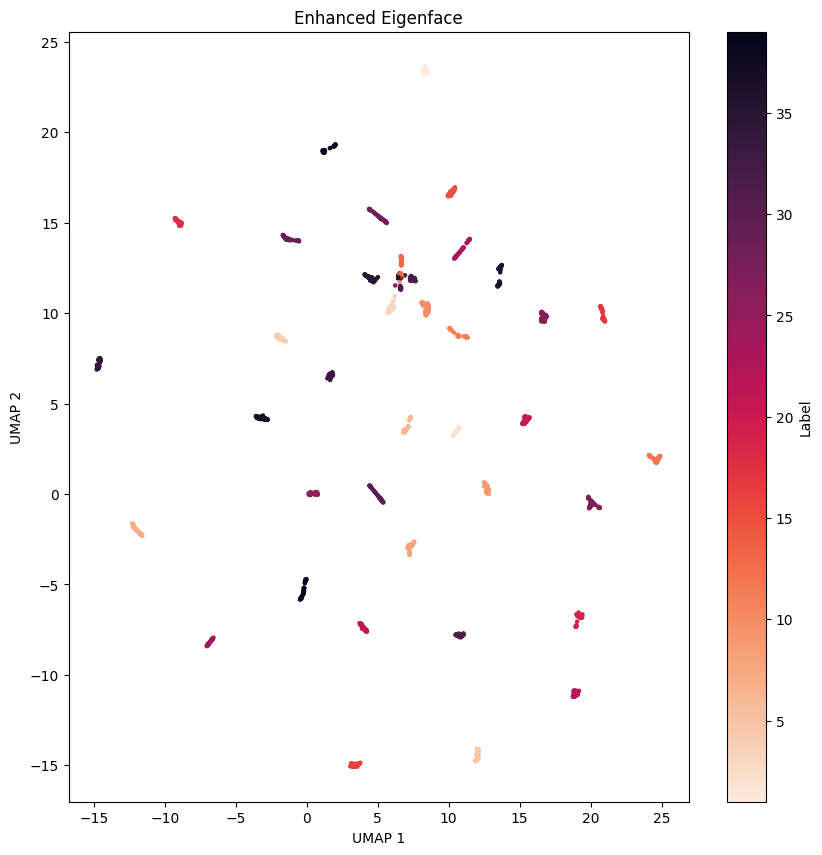

In [15]:
proposed_model_weights = proposed_model._X_weights

helpers.plot_umap_2d("Enhanced Eigenface", proposed_model_weights, train_labels)

### False positives

In [16]:
def plot_false_positives(test_images, test_labels, y_pred, n=None):
    misclassified_indices = np.where(test_labels != y_pred)
    
    true_labels = test_labels[misclassified_indices]
    predicted_labels = y_pred[misclassified_indices]

    true_images = test_images[misclassified_indices]

    for i in range(len(true_labels)):
        if n is not None and i >= n:
            break
        helpers.plot_portraits([true_images[i], test_images[test_labels == predicted_labels[i]][0]], [true_labels[i], predicted_labels[i]], N, N, 1, 2, title=f"True: {true_labels[i]}, Predicted: {predicted_labels[i]}")

#### Existing algorithm (First 5)

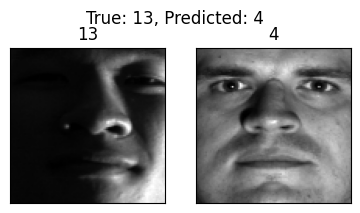

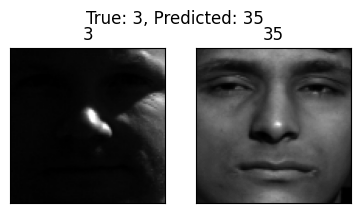

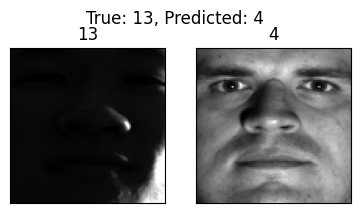

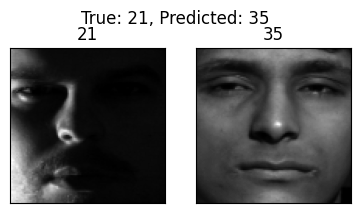

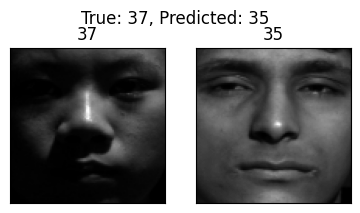

In [17]:
plot_false_positives(test_images, test_labels, existing_y_pred, 5)

#### Proposed algorithm (All)
Only 1 false positive

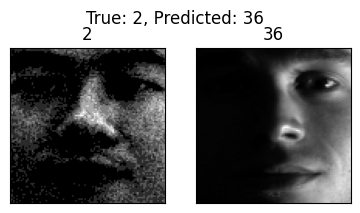

In [18]:
plot_false_positives(test_images, test_labels, proposed_y_pred)